# Quarentena Dados

## Aula 01

In [8]:
print("Fabio Araujo")

Fabio Araujo


In [0]:
nome_do_filme = "Totoro"

In [10]:
print(nome_do_filme)

Totoro


In [11]:
nome_do_filme

'Totoro'

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/fabioaraujo/QuarentenaDados/master/bases/movielens-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]

In [18]:
filmes

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# lendo a documentação do tipo

?filmes

In [0]:
# lendo a documentação de um método ou atributo

?filmes.head

In [22]:
avaliacoes = pd.read_csv("https://github.com/fabioaraujo/QuarentenaDados/blob/master/bases/movielens-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
# retorna linhas, colunas

avaliacoes.shape

(100836, 4)

In [24]:
len(avaliacoes)

100836

In [25]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [26]:
# alterando o nome das colunas

avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento" ]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
avaliacoes_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_filme_1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [28]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [29]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [30]:
avaliacoes_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [31]:
avaliacoes_filme_1["nota"].mean()

3.9209302325581397

In [32]:
#Agrupando por filmeID, extraindo apenas a coluna nota e pegando a média
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [33]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [34]:
filmes_com_media.sort_values("nota")

,filmeId,titulo,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [35]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


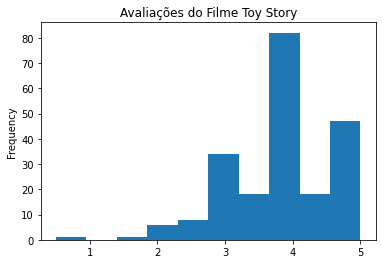

In [36]:
# distribuição de notas

avaliacoes.query("filmeId == 1")["nota"].plot(kind="hist", 
                                              title="Avaliações do Filme Toy Story")

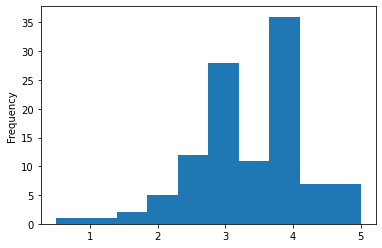

In [37]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind="hist")

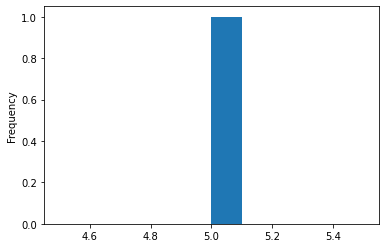

In [38]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist")

## Desafio 1 do Paulo Silveira

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [39]:
is_nan = filmes_com_media.isna()

linhas_com_nan = is_nan.any(axis=1)

filmes_com_media[linhas_com_nan]

,filmeId,titulo,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do Guilherme Silveira

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [40]:
filmes_com_media.columns

Index(['filmeId', 'titulo', 'genero', 'nota'], dtype='object')

In [41]:
filmes_com_media.rename(columns={"nota":"nota_media"}, inplace=True)
filmes_com_media.columns

Index(['filmeId', 'titulo', 'genero', 'nota_media'], dtype='object')

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [42]:
avaliacoes_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
avaliacoes_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [43]:
avaliacoes_por_filme.name

'nota'

In [44]:
avaliacoes_por_filme.name = "quantidade_votos"
avaliacoes_por_filme.name

'quantidade_votos'

In [45]:
filmes_com_media_quantidade = filmes_com_media.join(avaliacoes_por_filme, on="filmeId")
filmes_com_media_quantidade.sort_values("nota_media", ascending=False).head()

,filmeId,titulo,genero,nota_media,quantidade_votos
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [46]:
filmes_com_media["nota_media"] = filmes_com_media["nota_media"].round(2)
filmes_com_media

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [53]:
filmes_com_media.genero.str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
filmes_com_media.genero.str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [61]:
filmes_com_media.genero.str.get_dummies("|").sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

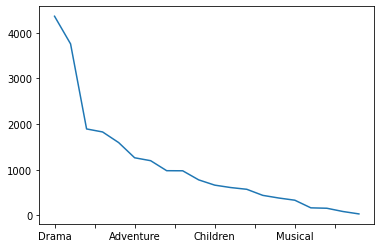

In [67]:
# por padrão o grafico é de linha

filmes_com_media.genero.str.get_dummies("|").sum().sort_values(ascending=False).plot()

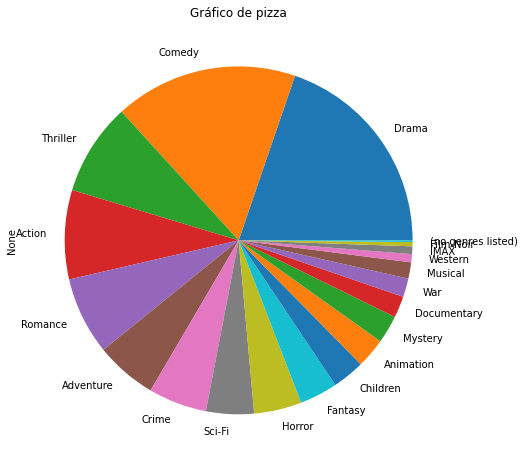

In [72]:
filmes_com_media.genero.str.get_dummies("|").sum().sort_values(ascending=False).plot(
    kind="pie",
    title="Gráfico de pizza",
    figsize=(8,8))

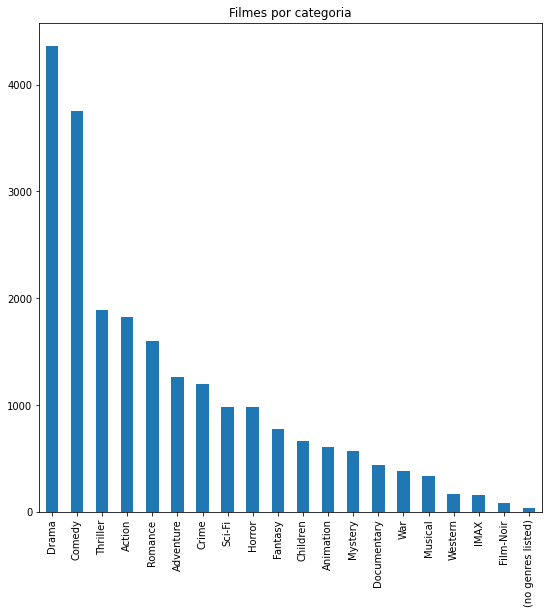

In [79]:
import matplotlib.pyplot as plt

filmes_com_media.genero.str.get_dummies("|").sum().sort_values(ascending=False).plot(kind="bar", title="Filmes por categoria", figsize=(9,9))
plt.show()

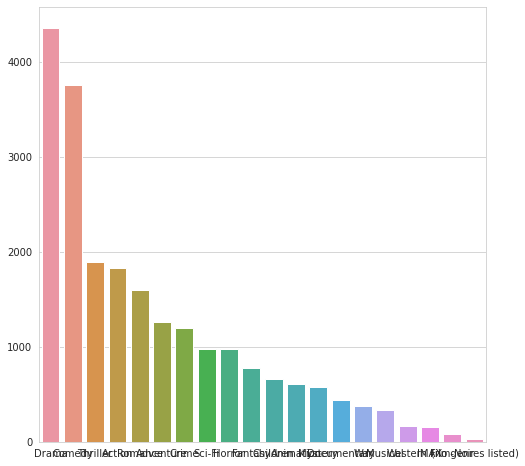

In [89]:
import seaborn as sns

filmes_por_genero = filmes_com_media.genero.str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

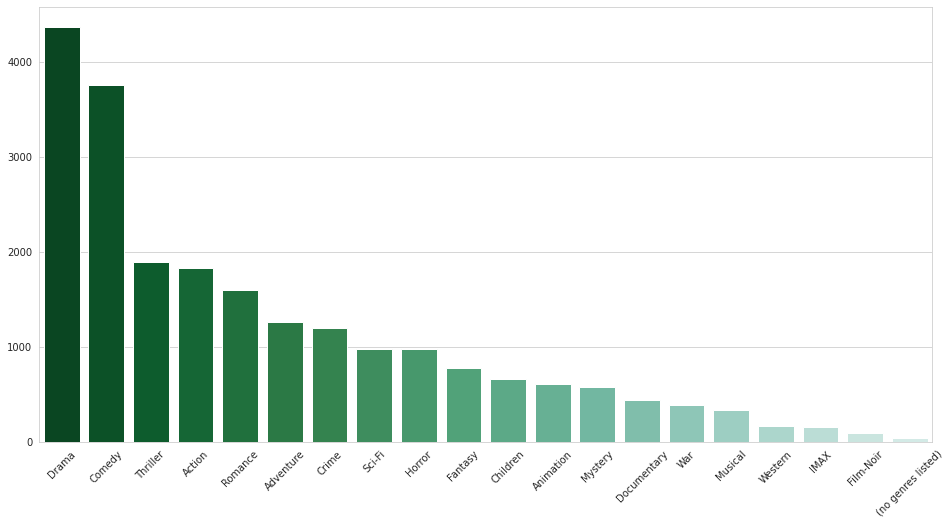

In [92]:
# alterar palette de cores
# google seaborn palette
# https://seaborn.pydata.org/tutorial/color_palettes.html

# tamanho da figura horizontal, vertical
plt.figure(figsize=(16,8))

# inclui linhas horizontais
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("whitegrid")

sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 5))

# rotacionando as categorias 45 graus
plt.xticks(rotation=45)
# o + em n_colors ajuda a não deixas as últimas cores tão perto de branco, ficando mais visivel

## Aula 2

In [0]:
# criando uma função
def plot_filme(id):
  notas_do_filme = avaliacoes.query(f"filmeId=={id}")["nota"]
  # histograma para verificar a distribuição de notas de cada filme
  notas_do_filme.plot(kind="hist")
  plt.show()
  # verificar onde fica os dados no boxplot conforme describe
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

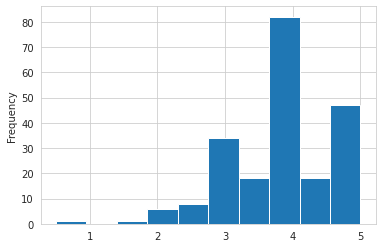

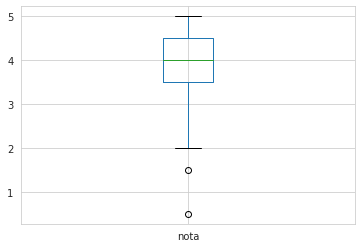

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [104]:
plot_filme(1)